# Unit #2 Code: Regression Basics

In this notebook, we will learn how to perform multiple linear regression in R and interpret some of the output.

## Problem #1

#### (a) Load the grades dataset, and explore the relationship between the gpa and sat variables. You might try to answer the following questions:

1. Is there a high correlation between gpa and sat?
2. Are the variables normally distributed?
3. Does a scatter plot (using ggplot if possible!) show a linear relationship, or some other relationship? Plot sat on the horizontal axis and gpa on the vertical axis. 

In [3]:
#library(tidyverse)
#library(ggplot2)
grades = read.table("https://www.colorado.edu/amath/sites/default/files/attached-files/grades_0.txt", sep = "\t")

In [22]:
summary(grades)
cor(grades)

      sat            gpa              x2                 x3      
 Min.   : 720   Min.   :0.790   Min.   :-2.86376   Min.   :1277  
 1st Qu.:1048   1st Qu.:1.965   1st Qu.:-0.71400   1st Qu.:2056  
 Median :1140   Median :2.335   Median : 0.02286   Median :2280  
 Mean   :1135   Mean   :2.319   Mean   :-0.02635   Mean   :2266  
 3rd Qu.:1240   3rd Qu.:2.683   3rd Qu.: 0.74088   3rd Qu.:2484  
 Max.   :1550   Max.   :3.840   Max.   : 2.29013   Max.   :3047  

,sat,gpa,x2,x3
sat,1.00000000,0.749101520,0.023439126,0.94795613
gpa,0.74910152,1.000000000,0.009135983,0.67025746
x2,0.02343913,0.009135983,1.000000000,0.04361405
x3,0.94795613,0.670257457,0.043614053,1.00000000


`geom_smooth()` using method = 'loess' and formula 'y ~ x'


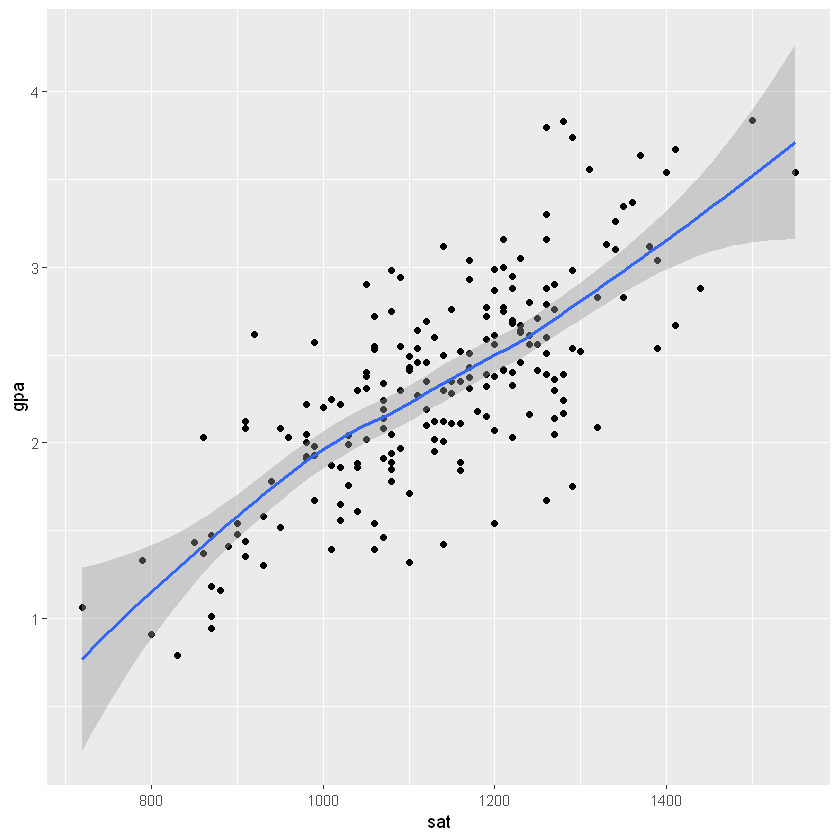

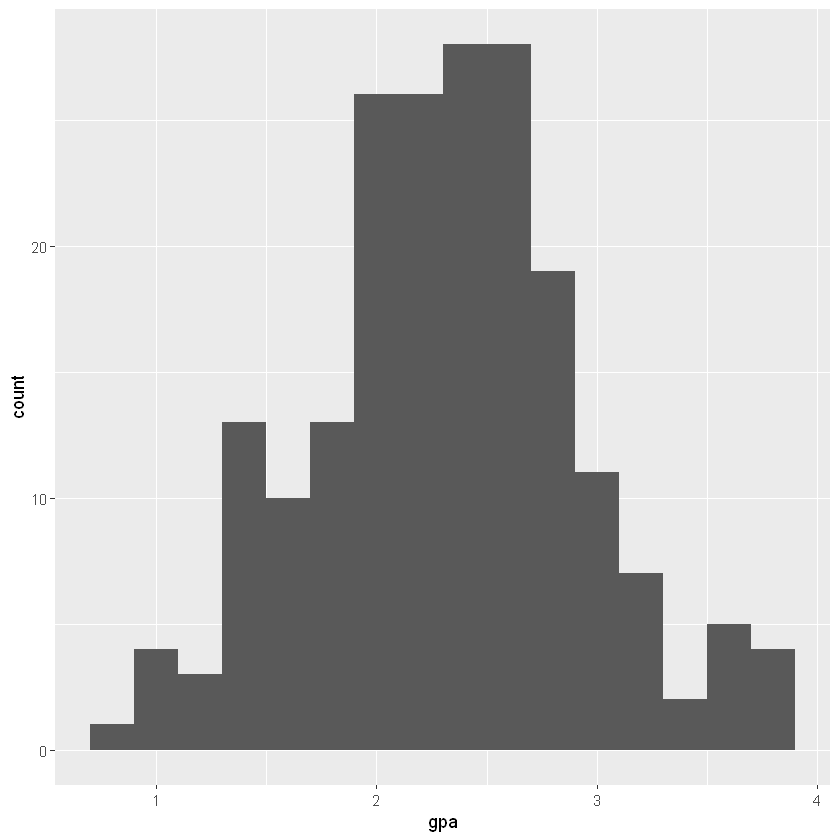


	Shapiro-Wilk normality test

data:  grades$gpa
W = 0.9923, p-value = 0.3749



	Shapiro-Wilk normality test

data:  grades$sat
W = 0.99343, p-value = 0.519


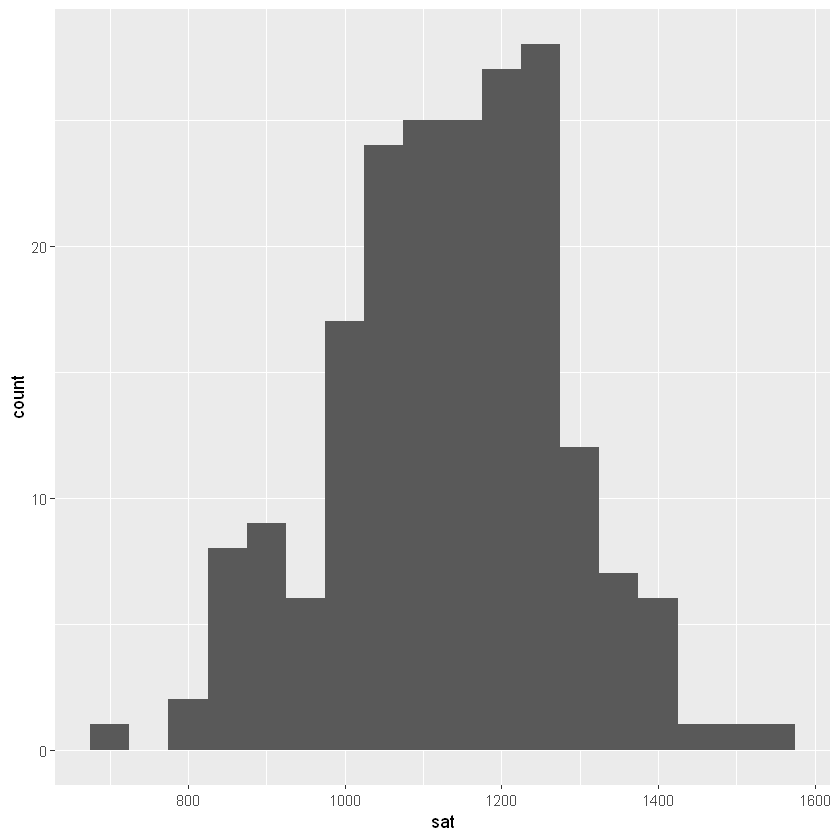

In [27]:
ggplot(grades, aes(x = sat, y = gpa))+geom_point()+geom_smooth()
ggplot(grades, aes(x = gpa))+geom_histogram(binwidth = 0.2)
ggplot(grades, aes(x = sat))+geom_histogram(binwidth = 50)
shapiro.test(grades$gpa)
shapiro.test(grades$sat)

1. Yes there is a high correlation, 0.749 out of [-1,1] between gpa, and sat.
2. gpa and sat both seem to be normally distributed, but they both seem to have a heavy left tail, and by deffinition niether one can be truly normal because the set of possible values is not $(- \infty , \infty)$
3. The scatter plot above appears to show a linear relationship between gpa and sat and the smoothed line of best fit is close to straight 

#### (b) Perform simple linear regression with gpa as the response and sat as the predictor using the lm() function. Use the summary function to print a summary of the model. Report and interpret the estimates of the model parameters and the coefficient of determination ($R^2$).

In [21]:
model1 <-lm(gpa~sat, data = grades)
summary(model1)


Call:
lm(formula = gpa ~ sat, data = grades)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.04954 -0.25960 -0.00655  0.26044  1.09328 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.1920638  0.2224502  -5.359 2.32e-07 ***
sat          0.0030943  0.0001945  15.912  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3994 on 198 degrees of freedom
Multiple R-squared:  0.5612,	Adjusted R-squared:  0.5589 
F-statistic: 253.2 on 1 and 198 DF,  p-value: < 2.2e-16


$\hat{\beta_{0}} = -1.192$ and $\hat{\beta_{1}} = 0.003094$ this means that our intercept is equal to $\hat{\beta_{0}}$, this is the average value we expect when sat = 0 and $\hat{\beta_{1}}$ is the average increase we expect to see per a one unit increase in sat score. $R^{2} = 0.5612$ and which means that 56.12% of the variance in gpa is explained by using sat scores as a predictor. 

#### (c) Complete each of the following:

1. Compute the hat matrix for the model from scratch (e.g., using functions like model.matrix() to obtain the design matrix $X$, solve() to compute an inverse, %*% for matrix multiplication, and t() for transpose). 
2. Compute the sum of the diagonals of the hat matrix. 
3. Then, note that lm.influence(NameOfModel)$hat gives the diagonals of the hat matrix. 
4. Print the residuals of the model, using resid().
5. What is the sum of the residuals? Do you think it will always be that value? If so, can you prove it?

Note: Above I had you compute a matrix inverse. In practice, [rarely is it a good idea to compute the inverse of a matrix](https://www.johndcook.com/blog/2010/01/19/dont-invert-that-matrix/)  (it's expensive!). There are fancy ways around inverse computation.

In [44]:
colOne = matrix(1,200,1);
X = cbind(colOne, grades$sat)
hat = X %*% solve(t(X) %*% X) %*% t(X)
head(hat)

0.0229697722,0.002738687,0.004696534,-0.005092701,0.0007808398,-0.001829623,0.0288433131,-0.004440086,0.010570075,0.010570075,...,1.383315e-02,-0.012271473,0.003391302,0.0007808398,0.013180537,0.010570075,0.002738687,-0.010966242,-0.009008395,-0.0005243916
0.0027386867,0.005284563,0.005038188,0.006270064,0.0055309384,0.005859439,0.0019995613,0.006187939,0.004299063,0.004299063,...,3.888437e-03,0.007173439,0.005202438,0.0055309384,0.003970562,0.004299063,0.005284563,0.007009189,0.006762814,0.0056951886
0.0046965337,0.005038188,0.005005125,0.005170441,0.0050712515,0.005115336,0.0045973437,0.005159420,0.004905935,0.004905935,...,4.850829e-03,0.005291674,0.005027167,0.0050712515,0.004861850,0.004905935,0.005038188,0.005269631,0.005236568,0.0050932937
-0.0050927012,0.006270064,0.005170441,0.010668554,0.0073696863,0.008835850,-0.0083915684,0.010302013,0.001871574,0.001871574,...,3.887015e-05,0.014700503,0.005903523,0.0073696863,0.000405411,0.001871574,0.006270064,0.013967421,0.012867798,0.0081027679
0.0007808398,0.005530938,0.005071251,0.007369686,0.0059906254,0.006603541,-0.0005982211,0.007216457,0.003692191,0.003692191,...,2.926046e-03,0.009055205,0.005377709,0.0059906254,0.003079275,0.003692191,0.005530938,0.008748747,0.008289060,0.0062970834
-0.0018296229,0.005859439,0.005115336,0.008835850,0.0066035414,0.007595678,-0.0040619311,0.008587815,0.002883028,0.002883028,...,1.642857e-03,0.011564226,0.005611404,0.0066035414,0.001890891,0.002883028,0.005859439,0.011068158,0.010324055,0.0070996099


In [45]:
sum(diag(hat))

[1] 2

In [46]:
lm.influence(model1)$hat

1           2           3           4           5           6 
0.022969772 0.005284563 0.005005125 0.010668554 0.005990625 0.007595678 
          7           8           9          10          11          12 
0.036636660 0.009959173 0.006726551 0.006726551 0.007595678 0.026997573 
         13          14          15          16          17          18 
0.019267390 0.008115448 0.016961489 0.045750763 0.005472515 0.008115448 
         19          20          21          22          23          24 
0.017036148 0.012229522 0.010668554 0.008682621 0.005005125 0.009959173 
         25          26          27          28          29          30 
0.007154834 0.009959173 0.005726119 0.006320785 0.005990625 0.014926495 
         31          32          33          34          35          36 
0.005144015 0.006012194 0.005990625 0.020454115 0.014926495 0.005284563 
         37          38          39          40          41          42 
0.006345671 0.008115448 0.006698347 0.010719985 0.007154834 0.022969772 
         43          44          45          46          47          48 
0.006345671 0.005284563 0.005050868 0.016961489 0.005050868 0.031543248 
         49          50          51          52          53          54 
0.009297196 0.005152310 0.008724098 0.013081110 0.007154834 0.014044806 
         55          56          57          58          59          60 
0.008724098 0.005472515 0.009341991 0.006698347 0.005296177 0.005296177 
         61          62          63          64          65          66 
0.006012194 0.018050091 0.006698347 0.005006784 0.009959173 0.005990625 
         67          68          69          70          71          72 
0.005707869 0.010668554 0.005707869 0.006726551 0.005707869 0.007123311 
         73          74          75          76          77          78 
0.008153607 0.006726551 0.022878522 0.005050868 0.021688242 0.008724098 
         79          80          81          82          83          84 
0.005050868 0.007154834 0.012287590 0.009341991 0.021600310 0.005005125 
         85          86          87          88          89          90 
0.005707869 0.005707869 0.007630519 0.009341991 0.008115448 0.014994517 
         91          92          93          94          95          96 
0.005006784 0.021600310 0.005005125 0.010007287 0.006320785 0.005144015 
         97          98          99         100         101         102 
0.005152310 0.005296177 0.005726119 0.005990625 0.014994517 0.005726119 
        103         104         105         106         107         108 
0.008682621 0.008724098 0.013980101 0.007630519 0.006012194 0.005707869 
        109         110         111         112         113         114 
0.020369501 0.005006784 0.005152310 0.005726119 0.005990625 0.006012194 
        115         116         117         118         119         120 
0.010007287 0.010007287 0.005006784 0.005284563 0.005726119 0.022878522 
        121         122         123         124         125         126 
0.010668554 0.021600310 0.010719985 0.015991632 0.006345671 0.010007287 
        127         128         129         130         131         132 
0.006320785 0.013081110 0.005152310 0.005055846 0.008153607 0.005050868 
        133         134         135         136         137         138 
0.008724098 0.013142497 0.016961489 0.016961489 0.008724098 0.008153607 
        139         140         141         142         143         144 
0.005006784 0.006320785 0.015991632 0.006012194 0.006345671 0.007123311 
        145         146         147         148         149         150 
0.005144015 0.007154834 0.006726551 0.020454115 0.007630519 0.007595678 
        151         152         153         154         155         156 
0.009341991 0.018050091 0.010719985 0.033153278 0.024204137 0.006345671 
        157         158         159         160         161         162 
0.005006784 0.005296177 0.008724098 0.006345671 0.005487447 0.006726551 
        163         164         165         166         167         

In [47]:
resid(model1)

1            2            3            4            5            6 
 0.499142669  0.218366466 -0.354461643  0.209678904  0.221194576  0.044965388 
           7            8            9           10           11           12 
 0.390658341  0.108736201  0.097054029 -0.252945971 -0.005034612 -0.586180549 
          13           14           15           16           17           18 
 0.041970778 -0.404091908 -0.273722174  0.024189186  0.759309170  0.255908092 
          19           20           21           22           23           24 
 0.353856185  0.251564310  0.379678904  0.316850795  0.295538357  0.698736201 
          25           26           27           28           29           30 
 0.056111326 -0.201263799 -0.100117862  0.462137279 -0.038805424 -0.105607580 
          31           32           33           34           35           36 
 0.297423763  0.468939435  0.021194576 -0.068971925 -0.385607580  0.278366466 
          37           38           39           40           41           42 
 0.447996732 -0.314091908  0.343079982  0.940455107  0.026111326 -0.500857331 
          43           44           45           46           47           48 
-0.142003268 -0.891633534  0.416481060  0.496277826 -0.083518940 -0.373352439 
          49           50           51           52           53           54 
 0.297793498 -0.287289752  0.083283216  0.332507014  0.016111326  0.206684294 
          55           56           57           58           59           60 
-0.106716784  0.369309170  0.022340513 -0.036920018  0.001767544 -0.058232456 
          61           62           63           64           65           66 
-0.451060565 -0.052779471  0.843079982 -0.325404346  0.058736201 -0.658805424 
          67           68           69           70           71           72 
-0.099748127  0.079678904  0.600251873  0.117054029 -0.369748127 -0.165977315 
          73           74           75           76           77           78 
-0.265774081  0.367054029 -0.099008658  0.076481060  0.400085372 -1.036716784 
          79           80           81           82           83           84 
 0.186481060  0.436111326  0.698569700  0.162340513 -0.319951361 -0.184461643 
          85           86           87           88           89           90 
-0.209748127 -0.259748127 -0.484831378 -0.437659487 -0.104091908  0.145741591 
          91           92           93           94           95           96 
-0.215404346 -0.489951361 -0.284461643 -0.598602190  0.632137279  0.217423763 
          97           98           99          100          101          102 
-0.557289752  0.081767544  0.279882138  0.071194576  0.305741591  0.099882138 
         103          104          105          106          107          108 
-0.063149205 -0.196716784  0.063449717  0.155168622 -0.141060565 -0.299748127 
         109          110          111          112          113          114 
-0.370894064 -0.915404346 -0.047289752 -0.170117862  0.121194576 -0.981060565 
         115          116          117          118          119          120 
-0.378602190  1.061397810  0.784595654  0.198366466  0.229882138  0.560991342 
         121          122          123          124          125          126 
 0.159678904 -0.029951361  0.180455107  0.364798888  0.197996732 -0.528602190 
         127          128          129          130          131          132 
 0.442137279 -0.227492986  0.122710248  0.393652951  0.034225919 -0.173518940 
         133          134          135          136          137          138 
-0.316716784 -0.062373003 -0.183722174  0.456277826  0.453283216 -0.115774081 
         139          140          141          142          143          144 
 0.164595654 -0.547862721 -0.155201112  0.038939435  0.607996732 -0.415977315 
         145          146          147          148          149          150 
 0.397423763 -0.153888674  0.297054029 -0.568971925 -0.034831378 -0.235034612 
         151          152          153          154          

In [48]:
sum(resid(model1))

[1] 9.818535e-16

The sum of the residuals is 0. This is because the linear model assumes that the error term, the residuals come from population $ \epsilon$ ~ $N(0, \sigma^{2}) $ so $$\sum_{i=1}^{n} (x_{i} - \bar{x}) = 0$$

#### (d) Plot the data and add (i) the regression line and (ii) the mean of the response without considering the predictor (this is just a horizontal line). Using a single $x$ value, be able to identify the three deviations discussed in class (explained deviation, residual deviation, and total deviation).

Challenge: try doing this plot with ggplot! geom_smooth() and geom_hline() might help.

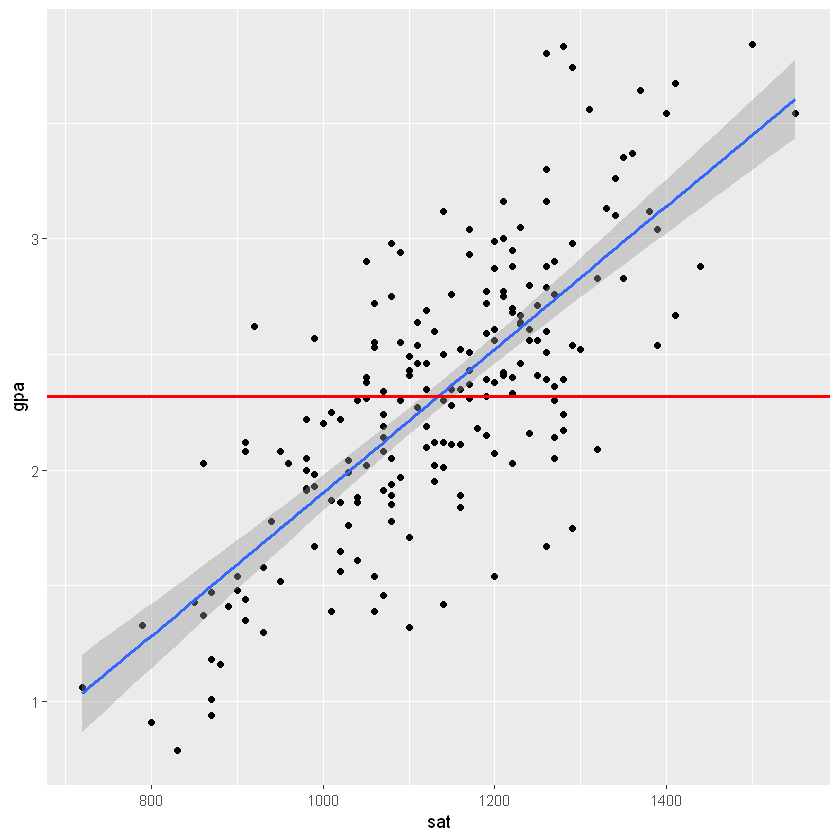

In [16]:
ggplot(data = grades, aes(x = sat, y = gpa))+geom_point()+geom_smooth(method = 'lm', formula = y~x)+geom_hline(yintercept = mean(grades$gpa), color = 'red', size = 1)

## Problem #2

#### (a) Now perform MLR, adding the x2 variable to the model. Use the summary function to print a summary of the model. 

In [49]:
model2 <-lm(gpa~sat + x2, data = grades)
summary(model2)


Call:
lm(formula = gpa ~ sat + x2, data = grades)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.05578 -0.26424 -0.00517  0.26388  1.08778 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.193114   0.223074  -5.349 2.45e-07 ***
sat          0.003095   0.000195  15.873  < 2e-16 ***
x2          -0.004730   0.026497  -0.179    0.859    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4004 on 197 degrees of freedom
Multiple R-squared:  0.5612,	Adjusted R-squared:  0.5568 
F-statistic:   126 on 2 and 197 DF,  p-value: < 2.2e-16


#### (b)  Compute the sum of the diagonals of the hat matrix. Compare it to the sum of the diagonals of the hat matrix in problem #1. Can you hypothesize what the sum of the diagonals of the hat matrix will always be?

In [50]:
X2 = cbind(colOne, grades$sat, grades$x2)
hat2 = X2 %*% solve(t(X2) %*% X2) %*% t(X2)
sum(diag(hat2))

[1] 3

At this point it looks like the sum of the diagonals of the hat matrix will be the number of predictors in our model

#### (c) Plot the residuals of the model (vertical) against the fitted values (horizontal). What do you notice about where they are centered? Does the variability in the residuals change as a function of the fitted values? You can extract the fitted values using fitted() and residuals using resid().

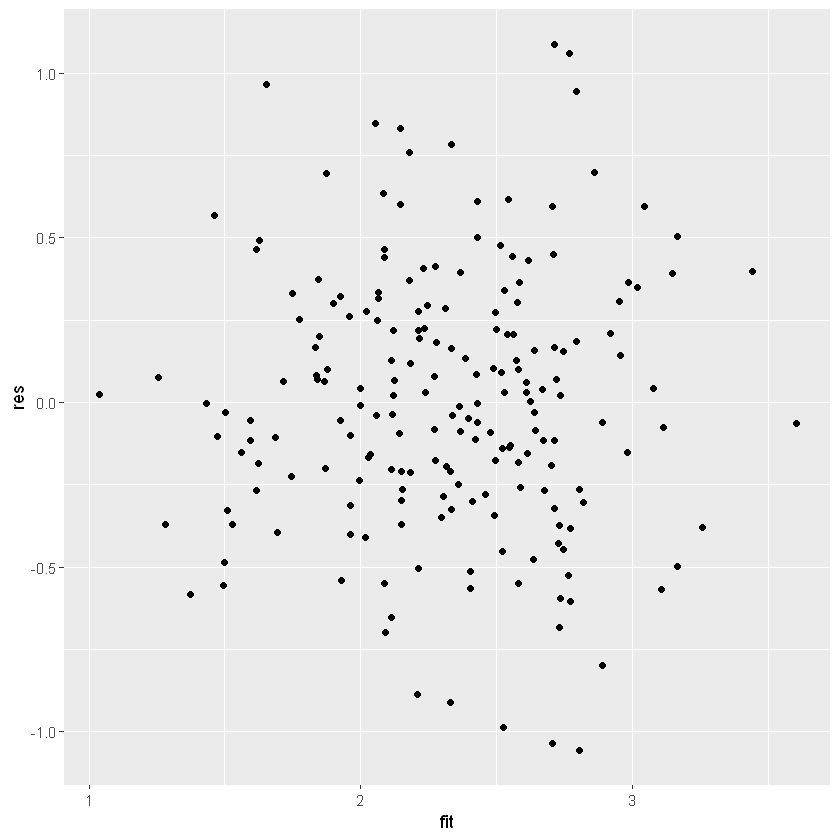

In [53]:
fit = fitted(model2)
res = resid(model2)
FR = as.data.frame(cbind(fit,res))
ggplot(data = FR, aes(x = fit, y = res)) + geom_point()

The residuals seem to be centered around 0 and do not seem to be a function of the fitted values, this is the requirement for linear models of our error terms having homoscedasticity and coming from an IID sample

#### (d) Interpret the estimates of the parameters in the model.

$\hat{\beta_{0}} = -1.193114; \hat{\beta_{1}} = 0.003095; \hat{\beta_{2}} = -0.004730$ this means that given sat and x2 are both equal to 0 we expect the average gpa to equal -1.193114 and for each 1 unit increase in sat scores we expect a 0.003095 unit increase in gpa on average, and for each 1 unit increase in x2 we expect a 0.004730 unit decrease in gpa

#### (e) Plot sat against x3 and interpret the plot. Then, add x3 to the regression model.  Print a summary. Do you notice anything interesting? Are there reasons why we might not want to inlcude x3 in the model?

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



Call:
lm(formula = gpa ~ sat + x2 + x3, data = grades)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.00946 -0.24533  0.02074  0.23306  1.05049 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.178e+00  2.197e-01  -5.360 2.32e-07 ***
sat          4.634e-03  6.038e-04   7.675 7.64e-13 ***
x2          -6.088e-06  2.615e-02   0.000  0.99981    
x3          -7.773e-04  2.892e-04  -2.688  0.00781 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3942 on 196 degrees of freedom
Multiple R-squared:  0.5768,	Adjusted R-squared:  0.5703 
F-statistic: 89.05 on 3 and 196 DF,  p-value: < 2.2e-16


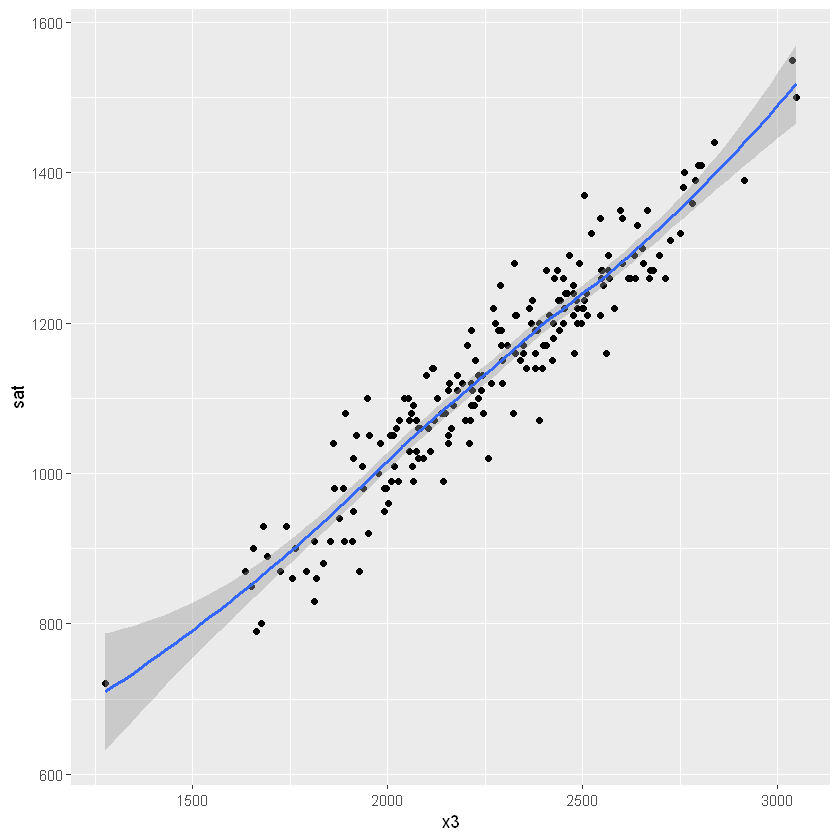

In [57]:
ggplot(grades, aes(x = x3, y = sat))+geom_point()+geom_smooth()
model3 = lm(gpa ~ sat + x2 + x3,data = grades)
summary(model3)

It does not appear that sat and x3 are linearly independent. This means that most of the variance in gpa vs. sat is the exact same variance in gpa vs. x3.